In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = train_df.pop('label').to_numpy()
X_train = train_df.to_numpy()
y_test = test_df.pop('label').to_numpy()
X_test = test_df.to_numpy()

In [4]:
X_train.shape

(60000, 784)

In [5]:
def display_image(dataset='train', n = 0):
    if dataset == 'test':
        dataset = X_test
        label = y_test
    else:
        dataset = X_train
        label = y_train
    img_data = dataset[n]
    print("Label:", label[n])
    plt.imshow(img_data.reshape((28,28)), cmap='gray')

Label: 3


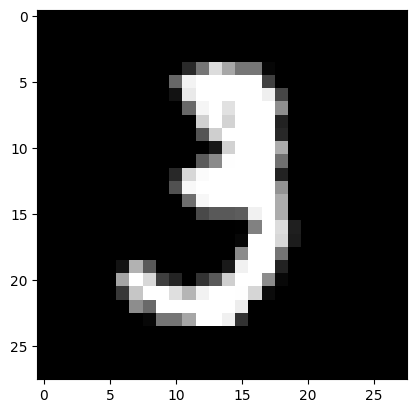

In [6]:
display_image(n = 10)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
model = keras.models.Sequential([
    layers.BatchNormalization(input_shape = [784]),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation = 'softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                        

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = 'accuracy')

In [11]:
EPOCHS = 25
BATCH_SIZE = 500

history = model.fit(X_train,y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_test, y_test))

Epoch 1/25
120/120 [==============================] - 3s 13ms/step - loss: 0.8566 - accuracy: 0.7226 - val_loss: 0.3086 - val_accuracy: 0.9120
Epoch 2/25
120/120 [==============================] - 1s 10ms/step - loss: 0.3593 - accuracy: 0.8909 - val_loss: 0.2193 - val_accuracy: 0.9397
Epoch 3/25
120/120 [==============================] - 1s 10ms/step - loss: 0.2815 - accuracy: 0.9143 - val_loss: 0.1891 - val_accuracy: 0.9478
Epoch 4/25
120/120 [==============================] - 1s 10ms/step - loss: 0.2388 - accuracy: 0.9278 - val_loss: 0.1768 - val_accuracy: 0.9530
Epoch 5/25
120/120 [==============================] - 1s 10ms/step - loss: 0.2128 - accuracy: 0.9348 - val_loss: 0.1696 - val_accuracy: 0.9569
Epoch 6/25
120/120 [==============================] - 1s 10ms/step - loss: 0.1879 - accuracy: 0.9418 - val_loss: 0.1666 - val_accuracy: 0.9601
Epoch 7/25
120/120 [==============================] - 1s 9ms/step - loss: 0.1764 - accuracy: 0.9459 - val_loss: 0.1621 - val_accuracy: 0.9616


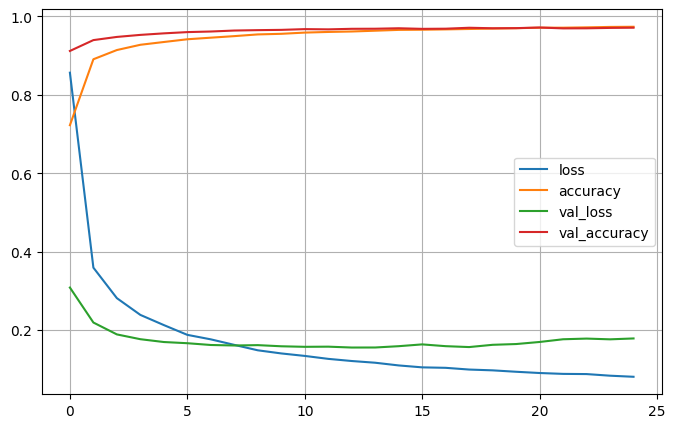

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [13]:
X_test.shape

(10000, 784)

In [14]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_predicted.shape

(10000, 10)

In [16]:
model.save('MNIST_digit_Classifier.h5')